**Input and Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/Credit Card Defaulter Prediction.csv')
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
5,6,50000,M,Graduate school,Single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,N
6,7,500000,M,Graduate school,Single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,N
7,8,100000,F,University,Single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,N
8,9,140000,F,High School,Married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,N
9,10,20000,M,High School,Single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,N


In [ ]:
print("The dataset has the following shape:",data.shape)

The dataset has the following shape: (30000, 25)


**Data Heatmap**

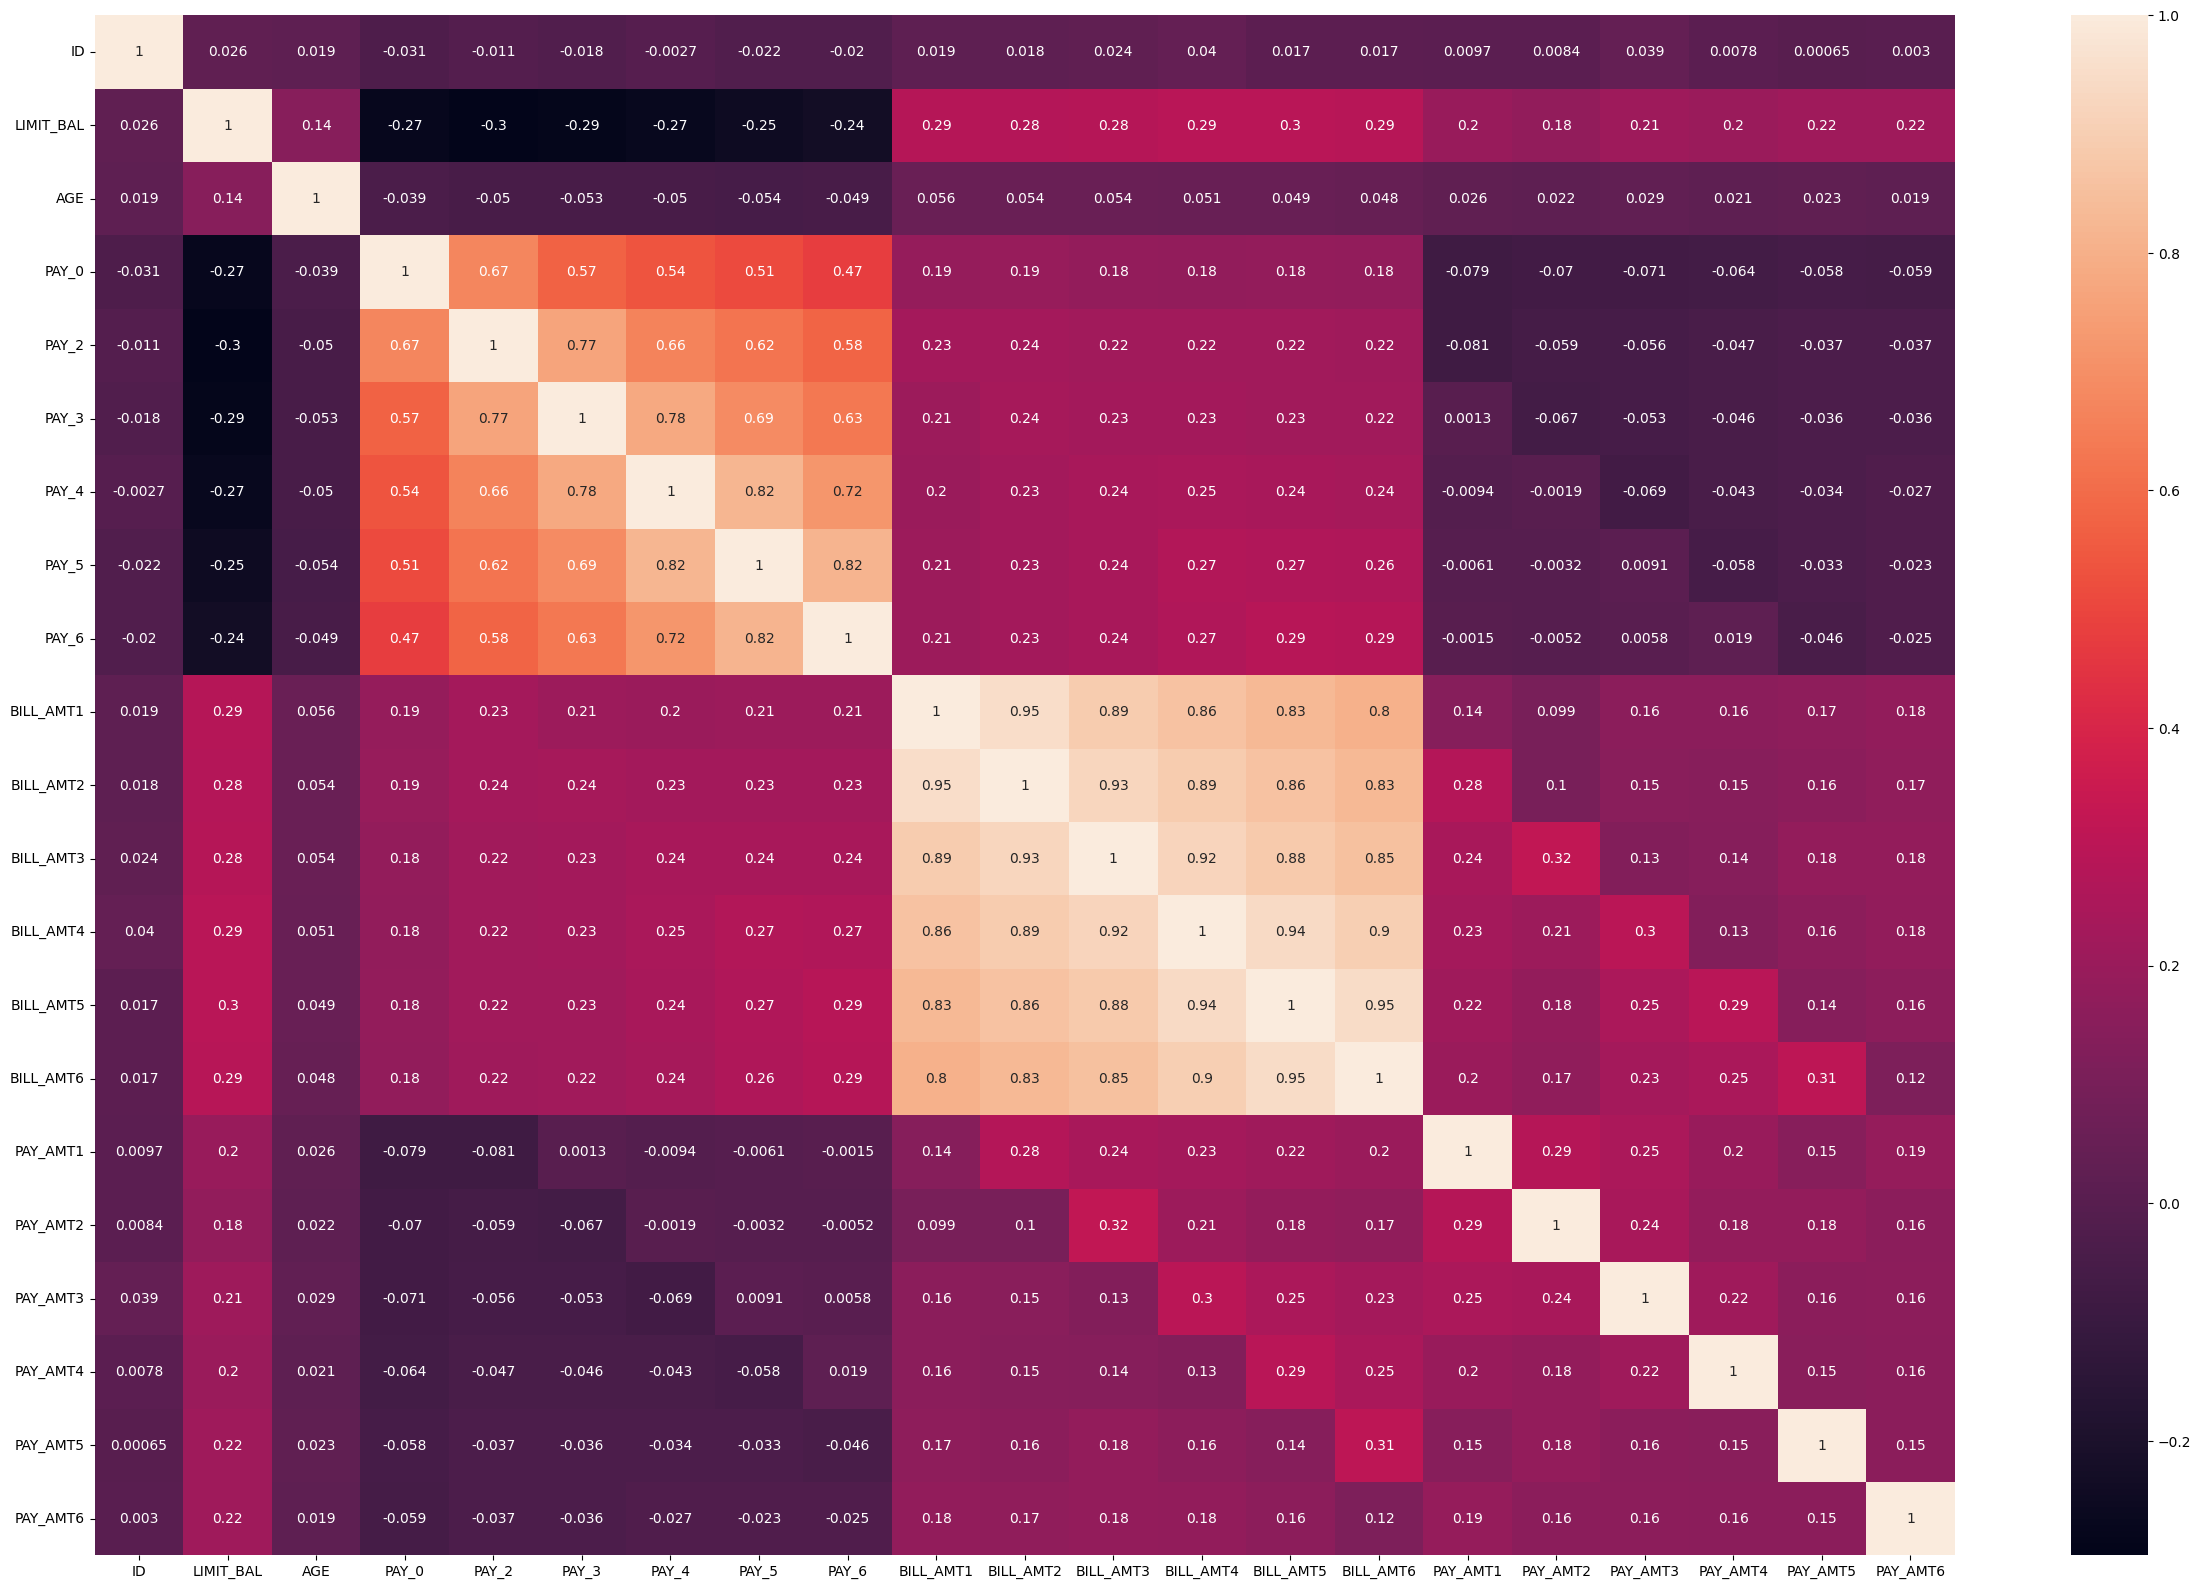

In [ ]:
import seaborn
plt.subplots(figsize=(30,20))
seaborn.heatmap(data.corr(numeric_only = True), annot=True)
plt.show()

In [ ]:
data['default '].value_counts()

default 
N    23364
Y     6636
Name: count, dtype: int64

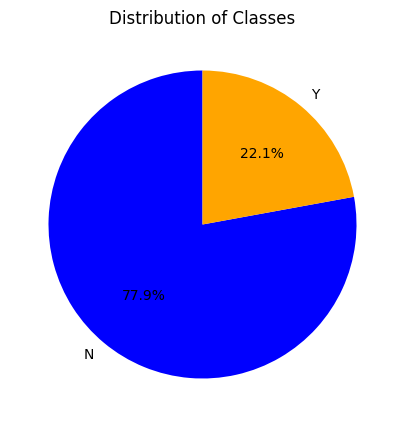

In [ ]:
plt.figure(figsize=(5, 5))
data['default '].value_counts().plot(kind='pie', colors=['blue', 'orange'], autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Distribution of Classes')
plt.show()

**Data Pre-processing**

In [ ]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [ ]:
data= data.drop([''What is your gender?','What is your age?'],axis=1)  #The following columns were not needed for any specific purpose
data.shape

(30000, 22)

In [ ]:
data.head(10)

,ID,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,-1,2,0,0,0,2,2682,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,0,0,0,0,0,0,29239,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,0,0,0,0,0,0,46990,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,-1,0,-1,0,0,0,8617,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
5,6,50000,M,0,0,0,0,0,0,64400,...,19394,19619,20024,2500,1815,657,1000,1000,800,N
6,7,500000,M,0,0,0,0,0,0,367965,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,N
7,8,100000,F,0,-1,-1,0,0,-1,11876,...,221,-159,567,380,601,0,581,1687,1542,N
8,9,140000,F,0,0,2,0,0,0,11285,...,12211,11793,3719,3329,0,432,1000,1000,1000,N
9,10,20000,M,-2,-2,-2,-2,-1,-1,0,...,0,13007,13912,0,0,0,13007,1122,0,N


In [ ]:
data1= pd.read_csv('/content/Credit Card Defaulter Prediction.csv')
print("Dataset shape before dropping: " , data1.shape)
print("Dataset shape after dropping: " ,data.shape)

Dataset shape before dropping:  (30000, 25)
Dataset shape after dropping:  (30000, 22)


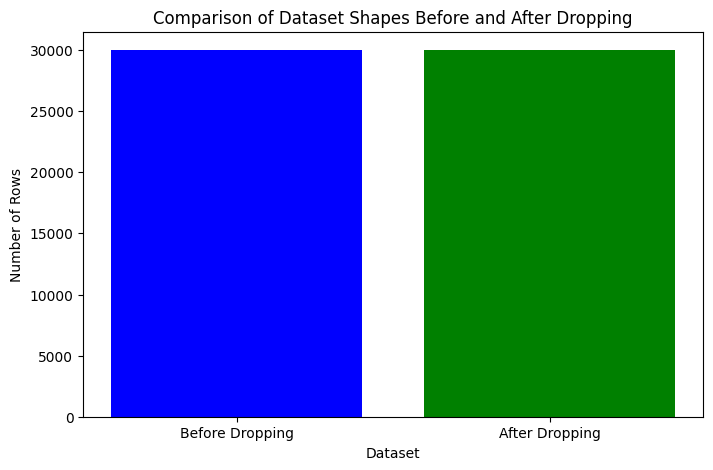

In [ ]:
dataset_shapes = [data1.shape, data.shape]
labels = ['Before Dropping', 'After Dropping']

plt.figure(figsize=(8, 5))
plt.bar(labels, [shape[0] for shape in dataset_shapes], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Number of Rows')
plt.title('Comparison of Dataset Shapes Before and After Dropping')
plt.show()

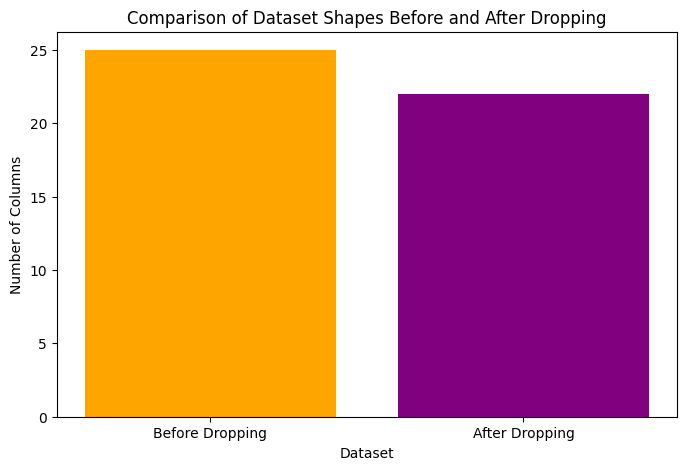

In [ ]:
dataset_shapes = [data1.shape, data.shape]
labels = ['Before Dropping', 'After Dropping']

plt.figure(figsize=(8, 5))
plt.bar(labels, [shape[1] for shape in dataset_shapes], color=['orange', 'purple'])
plt.xlabel('Dataset')
plt.ylabel('Number of Columns')
plt.title('Comparison of Dataset Shapes Before and After Dropping')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   PAY_0      30000 non-null  int64 
 4   PAY_2      30000 non-null  int64 
 5   PAY_3      30000 non-null  int64 
 6   PAY_4      30000 non-null  int64 
 7   PAY_5      30000 non-null  int64 
 8   PAY_6      30000 non-null  int64 
 9   BILL_AMT1  30000 non-null  int64 
 10  BILL_AMT2  30000 non-null  int64 
 11  BILL_AMT3  30000 non-null  int64 
 12  BILL_AMT4  30000 non-null  int64 
 13  BILL_AMT5  30000 non-null  int64 
 14  BILL_AMT6  30000 non-null  int64 
 15  PAY_AMT1   30000 non-null  int64 
 16  PAY_AMT2   30000 non-null  int64 
 17  PAY_AMT3   30000 non-null  int64 
 18  PAY_AMT4   30000 non-null  int64 
 19  PAY_AMT5   30000 non-null  int64 
 20  PAY_AMT6   30000 non-null  i

**Data Encoding**

In [ ]:
# Default encoding
data['default '].unique()
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['default '] = encode.fit_transform(data['default '])
print(data[['default ' ]].head(5))

   default 
0         1
1         1
2         0
3         0
4         0


In [ ]:
data['SEX'].unique()
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['SEX'] = encode.fit_transform(data['SEX'])
print(data[['SEX']].head(5))

   SEX
0    0
1    0
2    0
3    0
4    1


In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,0,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,-1,2,0,0,0,2,2682,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,0,0,0,0,0,0,29239,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,0,0,0,0,0,0,46990,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,-1,0,-1,0,0,0,8617,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Feature selection and dataset splitting (70:30)**

In [ ]:
#splitting the dataset according to features and the variable which we encoded
feature_columns = ['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
variable = ['default ']
X = data[feature_columns]
Y = data[variable]

# here 70% data is for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Decision Tree Model**

In [ ]:
#before scaling
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
classifer = DecisionTreeClassifier()
classifer.fit(X_train, Y_train)

Y_Predicted = classifer.predict(X_test)
acc_dt = metrics.accuracy_score(Y_test, Y_Predicted)
prec_dt = metrics.precision_score(Y_test, Y_Predicted)
rec_dt = metrics.recall_score(Y_test, Y_Predicted)
print("Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", rec_dt)

Accuracy: 0.7252222222222222
Precision: 0.38332511100148003
Recall: 0.3885


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
classifer = DecisionTreeClassifier()
classifer.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_Predicted = classifer.predict(X_test_scaled)
scaled_acc_dt = metrics.accuracy_score(Y_test, Y_Predicted)
scaled_prec_dt = metrics.precision_score(Y_test, Y_Predicted)
scaled_rec_dt = metrics.recall_score(Y_test, Y_Predicted)
print("Accuracy:", scaled_acc_dt)
print("Precision:", scaled_prec_dt)
print("Recall:", scaled_rec_dt)

Accuracy: 0.726
Precision: 0.38244197780020184
Recall: 0.379


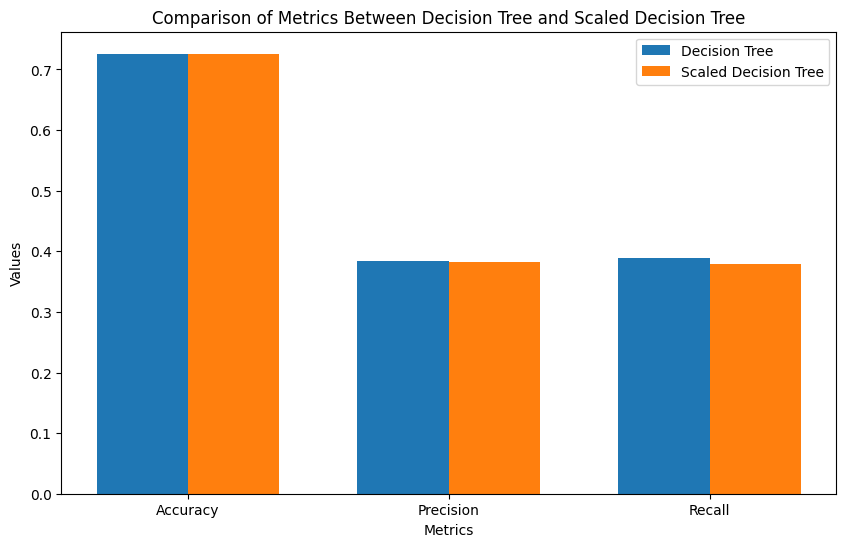

In [ ]:
# Data
metrics = ['Accuracy', 'Precision', 'Recall']
values_dt = [acc_dt, prec_dt, rec_dt]
values_scaled_dt = [scaled_acc_dt, scaled_prec_dt, scaled_rec_dt]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))

bar1 = ax.bar(index, values_dt, bar_width, label='Decision Tree')
bar2 = ax.bar([i + bar_width for i in index], values_scaled_dt, bar_width, label='Scaled Decision Tree')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics Between Decision Tree and Scaled Decision Tree')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import metrics
# from sklearn import tree
# import matplotlib.pyplot as plt

# # Train the Decision Tree classifier
# classifier = DecisionTreeClassifier()
# classifier.fit(X_train_scaled, Y_train)

# # Plot the Decision Tree model
# plt.figure(figsize=(12, 8))
# tree.plot_tree(classifier,
#                feature_names=X.columns,
#                class_names=['1', '2', '3', '4', '5', '6', '7'],
#                filled=True)
# #plt.show()

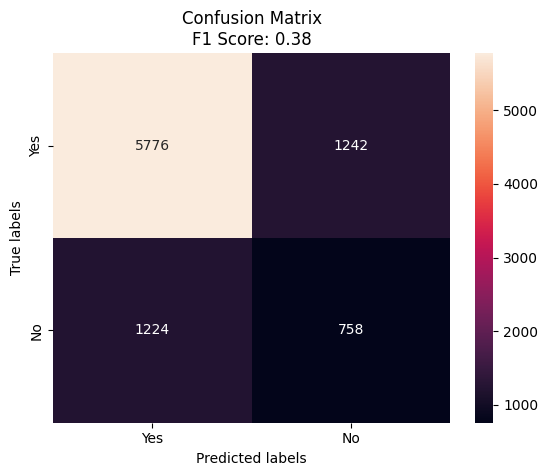

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, f1_score

f1 = f1_score(Y_test, Y_Predicted)
matrix= confusion_matrix(Y_Predicted, Y_test)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title(f'Confusion Matrix\nF1 Score: {f1:.2f}')
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['Yes', 'No'])

plt.show()



**Logistic Regression**

In [ ]:
# # before scaling

# from sklearn.linear_model import LogisticRegression
# lgr = LogisticRegression(random_state=0)
# from sklearn import metrics
# lgr = lgr.fit(X_train, Y_train)

# Y_Predicted = lgr.predict(X_test)
# acc_lr = metrics.accuracy_score(Y_test, Y_Predicted)
# prec_lr = metrics.precision_score(Y_test, Y_Predicted)
# rec_lr = metrics.recall_score(Y_test, Y_Predicted)
# print("Accuracy:", acc_lr)
# print("Precision:", prec_lr)
# print("Recall:", rec_lr)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# lgr = LogisticRegression(random_state=0)
# lgr = lgr.fit(X_train_scaled, Y_train)

In [ ]:
# Y_Predicted = lgr.predict(X_test_scaled)
# lgr_acc = metrics.accuracy_score(Y_test, Y_Predicted)
# lgr_prec = metrics.precision_score(Y_test, Y_Predicted)
# lgr_rec = metrics.recall_score(Y_test, Y_Predicted)
# print("Accuracy:", lgr_acc)
# print("Precision:", lgr_prec)
# print("Recall:", lgr_rec)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=0)


In [ ]:
# ### Before scaling

# lgr = lgr.fit(X_train, Y_train)

# Y_Predicted = lgr.predict(X_test)
# acc_lr = metrics.accuracy_score(Y_test, Y_Predicted)
# prec_lr = metrics.precision_score(Y_test, Y_Predicted)
# rec_lr = metrics.recall_score(Y_test, Y_Predicted)
# print("Accuracy:", acc_lr)
# print("Precision:", prec_lr)
# print("Recall:", rec_lr)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc = RandomForestClassifier(n_estimators=75)

In [ ]:
rfc.fit(X_train, Y_train)

<ipython-input-98-96e8a0ce9cd3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=75)

In [ ]:
##before scaling

Y_Predicted = rfc.predict(X_test)
rfc_acc = metrics.accuracy_score(Y_test, Y_Predicted)
rfc_prec = metrics.precision_score(Y_test, Y_Predicted)
rfc_rec = metrics.recall_score(Y_test, Y_Predicted)
print("Accuracy:", rfc_acc)
print("Precision:", rfc_prec)
print("Recall:", rfc_rec)

Accuracy: 0.8121111111111111
Precision: 0.6361233480176212
Recall: 0.361


In [ ]:
rfc.fit(X_train_scaled, Y_train)

<ipython-input-100-2ee7e1f3e909>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_scaled, Y_train)


RandomForestClassifier(n_estimators=75)

In [ ]:
#after scaling
Y_Predicted = rfc.predict(X_test_scaled)
scaled_rfc_acc = metrics.accuracy_score(Y_test, Y_Predicted)
scaled_rfc_prec = metrics.precision_score(Y_test, Y_Predicted)
scaled_rfc_rec = metrics.recall_score(Y_test, Y_Predicted)
print("Accuracy:", scaled_rfc_acc)
print("Precision:", scaled_rfc_prec)
print("Recall:", scaled_rfc_rec)



Accuracy: 0.8106666666666666
Precision: 0.6298245614035087
Recall: 0.359


In [ ]:
matrix= confusion_matrix(Y_Predicted, Y_test)
print(matrix)

[[6578 1282]
 [ 422  718]]


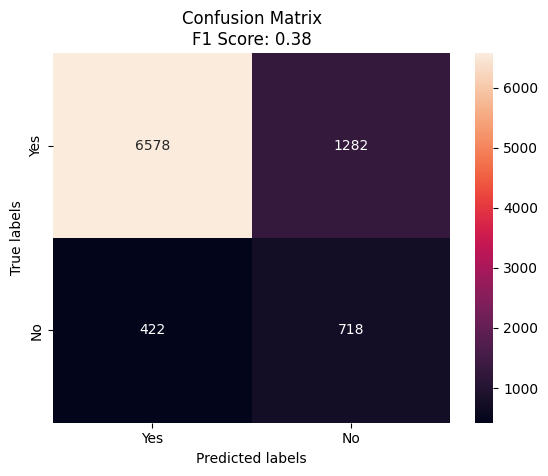

In [ ]:
ax = plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)

ax.set_title('Confusion Matrix\nF1 Score: {:.2f}'.format(f1))

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Yes', 'No'])
ax.yaxis.set_ticklabels(['Yes', 'No'])

plt.show()

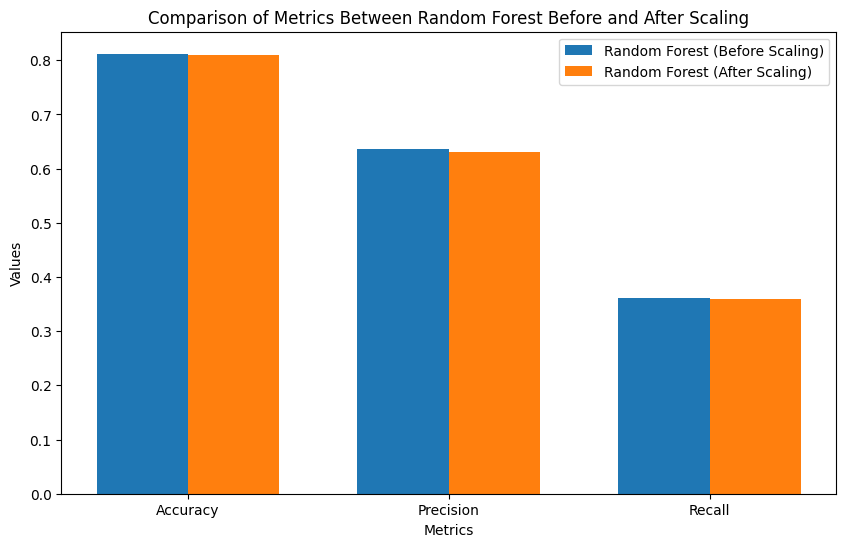

In [ ]:
# Data comparison
metrics = ['Accuracy', 'Precision', 'Recall']
values_rf = [rfc_acc, rfc_prec, rfc_rec]  # Metrics values before scaling
values_scaled_rf = [scaled_rfc_acc, scaled_rfc_prec, scaled_rfc_rec]  # Metrics values after scaling

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))

bar1 = ax.bar(index, values_rf, bar_width, label='Random Forest (Before Scaling)')
bar2 = ax.bar([i + bar_width for i in index], values_scaled_rf, bar_width, label='Random Forest (After Scaling)')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics Between Random Forest Before and After Scaling')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

**NN**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
nnc=MLPClassifier(hidden_layer_sizes=(26), activation="relu", max_iter=25000)

In [ ]:

nnc.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=26, max_iter=25000)

In [ ]:
#befor scaling

Y_Predicted = nnc.predict(X_test)
nn_acc = metrics.accuracy_score(Y_test, Y_Predicted)
nn_prec = metrics.precision_score(Y_test, Y_Predicted)
nn_rec = metrics.recall_score(Y_test, Y_Predicted)
print("Accuracy:", nn_acc)
print("Precision:", nn_prec)
print("Recall:", nn_rec)

Accuracy: 0.37155555555555553
Precision: 0.24412094064949608
Recall: 0.872


In [ ]:
nnc.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=26, max_iter=25000)

In [ ]:
#after scaling
Y_Predicted = nnc.predict(X_test_scaled)
nn_acc = metrics.accuracy_score(Y_test, Y_Predicted)
nn_prec = metrics.precision_score(Y_test, Y_Predicted)
nn_rec = metrics.recall_score(Y_test, Y_Predicted)
print("Accuracy:", nn_acc)
print("Precision:", nn_prec)
print("Recall:", nn_rec)


Accuracy: 0.8167777777777778
Precision: 0.6588235294117647
Recall: 0.364


In [ ]:
matrix= confusion_matrix(Y_Predicted, Y_test)
print(matrix)

[[6623 1272]
 [ 377  728]]


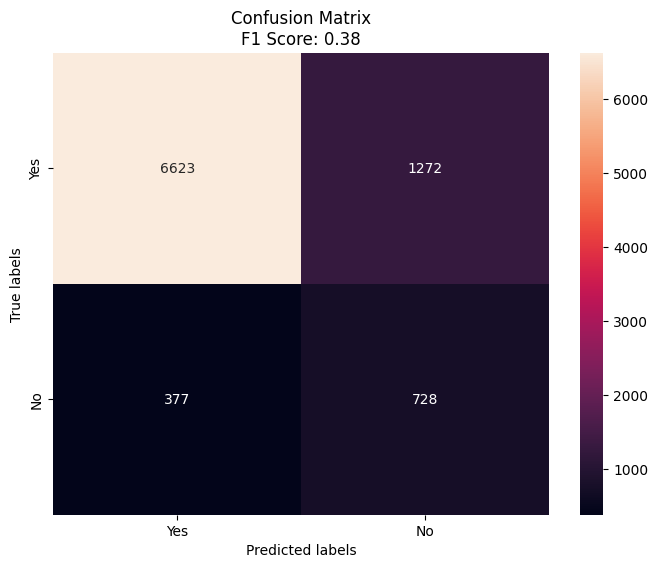

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)

# Adding F1 score to the title
ax.set_title('Confusion Matrix\nF1 Score: {:.2f}'.format(f1))

# Labels and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Yes', 'No'])
ax.yaxis.set_ticklabels(['Yes', 'No'])

plt.show()